In [1]:
import meanz_modules as mzmod
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline

from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64


In [2]:
# # Apply the above routine to our baseline sim, and show the plots
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside)
bgroup.plot_all(closefigs=True)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


In [3]:
ilim = [24.1, 25.3]
meanz = [0.92, 1.08]

a,b = mzmod.coeff_solve(ilim,meanz)
print(a,b)

0.044444444444444446 -0.7644444444444444


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Dataset definitions

In [4]:
v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
print(v33_name_list)

['baseline_v3.3_10yrs', 'noroll_v3.3_10yrs', 'roll_mid1_const_season6v3.3_10yrs', 'roll_mid1_const_season2v3.3_10yrs', 'roll_mid1_const_season4v3.3_10yrs', 'roll_mid2_const_season2v3.3_10yrs', 'roll_mid2_const_season4v3.3_10yrs', 'roll_mid2_const_season6v3.3_10yrs']


## In this section, we get maps of the i-band depth across the survey for v3.3 simulations at year=3

In [5]:
# # Run our above routine for the v3.3 simulations at year 3
# for i in range(len(v33_sim_list)):
#     this_run = v33_sim_list[i]
#     this_fname = v33_name_list[i]
#     bgroup, bd = mzmod.metric_plots(this_fname, this_run, year=3)
#     #bgroup.plot_all(closefigs=False)

### In this section, we run our metric calculations at each year for all v3.3 simulations and produce a dataframe to save to disk.

In [6]:
import numpy as np
import pandas as pd
import importlib
importlib.reload(mzmod)

v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db']
#,
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
nums =len(v33_name_list)
v33_df = mzmod.get_year_by_year_metrics_jn(np.arange(1,10), v33_name_list[:nums], v33_sim_list[:nums])
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:357: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


,Strategy,Year,Median i-band depth,Mean i-band depth,Std i-band depth,IQR i-band depth,Mean z,Std z,Clbias,Used meanz
0,baseline_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.8739907707530584],[-6.497079884072299e-05],[-2.663529584808713e-05],[0.8739907707530584]
1,noroll_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.8748604166995613],[9.557492973325419e-05],[3.92654059161281e-05],[0.8748604166995613]
2,baseline_v3.3_10yrs,2,25.635288,25.598740,0.197662,0.260341,[0.9054434326003967],[-0.00022277793086797074],[-9.853787420537891e-05],[0.9054434326003967]
3,noroll_v3.3_10yrs,2,25.626280,25.601309,0.170386,0.215176,[0.9092596912432879],[0.0004050647097790296],[0.00018079481513820985],[0.9092596912432879]
4,baseline_v3.3_10yrs,3,25.843019,25.824180,0.217975,0.277805,[0.9271789701241321],[0.00040898651143834053],[0.00019038063260528714],[0.9271789701241321]
5,noroll_v3.3_10yrs,3,25.866495,25.839571,0.168145,0.213265,[0.9297044455835239],[0.0005569001391762884],[0.00026075753154836785],[0.9297044455835239]
6,baseline_v3.3_10yrs,4,25.994479,25.965053,0.172323,0.220420,[0.940635949162423],[0.0005424844944765732],[0.0002604902835674699],[0.940635949162423]
7,noroll_v3.3_10yrs,4,26.001999,25.975704,0.164686,0.209550,[0.941800627540942],[0.0005732695896595421],[0.00027600827010102304],[0.941800627540942]
8,baseline_v3.3_10yrs,5,26.073056,26.048741,0.179762,0.229556,[0.9480997989235203],[0.0004926460934802543],[0.00024062637637211286],[0.9480997989235203]
9,noroll_v3.3_10yrs,5,26.095760,26.066504,0.162930,0.207229,[0.951744115389161],[0.0006732879738546452],[0.0003315920268219575],[0.951744115389161]


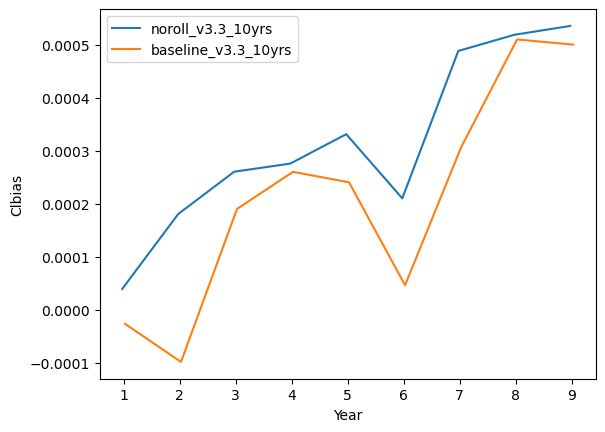

In [11]:
importlib.reload(mzmod)

#mzmod.plot_meanz_metrics_by_year(v33_df, years=[3,5],num_bins=5)
mzmod.plot_metric_by_year(v33_df, 'Clbias')
#mzmod.plot_metric_by_year(v33_df, 'Std z')

In [ ]:
v33_df.to_pickle('v33_dataframe_withmeanz.pkl')

In [ ]:
vec = mzmod.sensitivity(num_bins=5,fiducial_ilim=24.1)
print(vec)
# import numpy.random as random
# vec = np.linspace(2,18,17)
# print(vec)
# random.shuffle(vec)
# print(vec)

[0.046745091529873814, 0.08500551112138602, 0.11915807457810432, 0.16180047285571472, 0.2539575165815878]


In [ ]:
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(5,1,sharex=True)
# x=np.linspace(0,5,100)
# axs[0].plot(x,x**2)
# axs[3].plot(x,x**2)

### Here we plot the year-by-year metric results.  We read in from the dataframe, so if it was already produced, we can skip over the previous chunk of notebook.

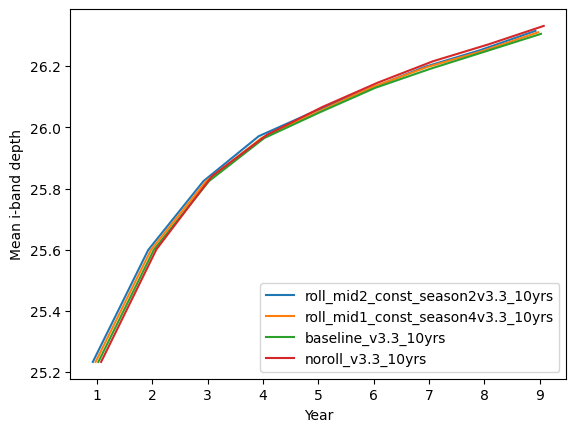

In [ ]:
v33_df = pd.read_pickle('v33_dataframe_withmeanz.pkl')
mzmod.plot_metric_by_year(v33_df, 'Mean i-band depth')